In [1]:
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

music_df = pd.read_csv('Music sales.csv')


In [2]:
music_df.head(5)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,FirstName,Genre,InvoiceDate,InvoiceID,LastName,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,Leonie,Rock,1/1/2008 0:00,1,Kahler,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,Leonie,Rock,1/1/2008 0:00,1,Kahler,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,Bjarn,Rock,1/2/2008 0:00,2,Hansen,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,Bjarn,Rock,1/2/2008 0:00,2,Hansen,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,Bjarn,Rock,1/2/2008 0:00,2,Hansen,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [26]:
# Graph 1- Most Popular Genre
pop_genre=music_df[(music_df['Region']=='Europe')|(music_df['Region']=='Asia')]
pop_genre2=pop_genre.groupby('Genre')['Quantity'].sum().to_frame().sort_values(by='Quantity',ascending=False).reset_index()
pop_genre2.head()

,Genre,Quantity
0,Rock,1284
1,Latin,472
2,Alternative & Punk,401
3,Metal,366
4,Jazz,108


Text(0.5,1,'Most Popular Genre in Asia and Europe')

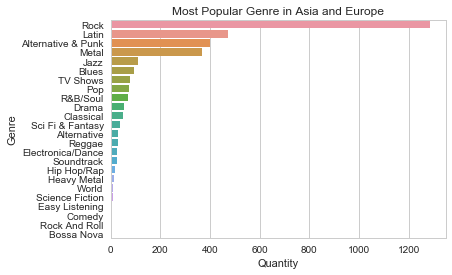

In [35]:
sns.set(style="whitegrid")
sns.barplot(x='Quantity', y='Genre', data=pop_genre2).set_title('Most Popular Genre in Asia and Europe')

In [5]:
# Graph2 - Top 20 Artists 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
artists=music_df[['Artist','Quantity','Genre']]
artists.head()

,Artist,Quantity,Genre
0,Accept,4,Rock
1,Accept,4,Rock
2,AC/DC,1,Rock
3,AC/DC,2,Rock
4,AC/DC,2,Rock


In [7]:
total_by_quantity=artists.groupby('Artist')['Quantity'].sum().to_frame().sort_values(by='Quantity',ascending=False).reset_index()
top20=total_by_quantity.head(20)
top20

,Artist,Quantity
0,Iron Maiden,390
1,U2,321
2,Led Zeppelin,268
3,Metallica,251
4,Os Paralamas Do Sucesso,134
5,Queen,124
6,R.E.M.,117
7,Deep Purple,114
8,Faith No More,108
9,Eric Clapton,107


In [8]:
raw=music_df.loc[music_df['Artist'].isin(top20['Artist'])]
raw2=raw.groupby(['Artist','Genre'])['Quantity'].sum().to_frame().reset_index()

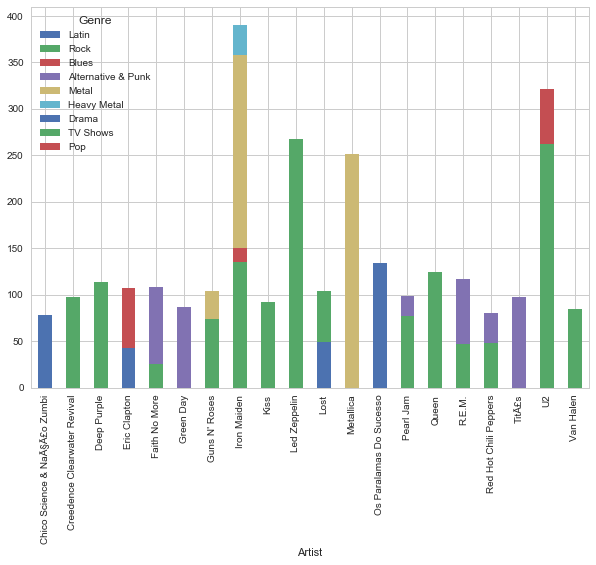

In [9]:
pivot_df = raw2.pivot(index='Artist', columns='Genre', values='Quantity')
pivot_df.loc[:,raw2.Genre.drop_duplicates()].plot.bar(stacked=True, figsize=(10,7))

In [10]:
# Graph 3 - Rock vs Alternative vs Heavy metal 
comparison=music_df[['Genre','Sales','InvoiceDate']].loc[music_df['Genre'].isin(['Rock','Alternative & Punk','Heavy Metal'])]
comparison.head()

,Genre,Sales,InvoiceDate
0,Rock,3.96,1/1/2008 0:00
1,Rock,3.96,1/1/2008 0:00
2,Rock,0.99,1/2/2008 0:00
3,Rock,1.98,1/2/2008 0:00
4,Rock,1.98,1/2/2008 0:00


In [11]:
comparison['InvoiceDate']=pd.to_datetime(comparison['InvoiceDate'])

In [12]:
comparison['InvoiceDate'].dtype

dtype('<M8[ns]')

In [13]:
comparison['year_month']=comparison['InvoiceDate'].map(lambda x: x.strftime('%Y-%m'))
comparison.head()

,Genre,Sales,InvoiceDate,year_month
0,Rock,3.96,2008-01-01,2008-01
1,Rock,3.96,2008-01-01,2008-01
2,Rock,0.99,2008-01-02,2008-01
3,Rock,1.98,2008-01-02,2008-01
4,Rock,1.98,2008-01-02,2008-01


In [14]:
Rock=comparison.loc[comparison['Genre']=='Rock'].groupby('year_month')['Sales'].sum().to_frame().reset_index()
Alternative=comparison.loc[comparison['Genre']=='Alternative & Punk'].groupby('year_month')['Sales'].sum().to_frame().reset_index()
Heavy_metal=comparison.loc[comparison['Genre']=='Heavy Metal'].groupby('year_month')['Sales'].sum().to_frame().reset_index()

In [16]:
Rock.head()

,year_month,Sales
0,2008-01,55.44
1,2008-02,13.86
2,2008-03,22.77
3,2008-04,57.42
4,2008-05,25.74


In [17]:
Rock.dtypes

year_month     object
Sales         float64
dtype: object

In [18]:
combine1=pd.merge(Rock,Alternative,on='year_month',how='outer')
combine2=pd.merge(combine1,Heavy_metal,on='year_month',how='outer')
combine2.rename(columns={'Sales_x':'Rock','Sales_y':'Alternative','Sales':'Heavy_metal'},inplace=True)
combine2.head()

,year_month,Rock,Alternative,Heavy_metal
0,2008-01,55.44,11.88,NaN
1,2008-02,13.86,NaN,NaN
2,2008-03,22.77,35.64,NaN
3,2008-04,57.42,0.99,NaN
4,2008-05,25.74,37.62,NaN


In [19]:
combine2.set_index('year_month').head()

,Rock,Alternative,Heavy_metal
year_month,,,
2008-01,55.44,11.88,NaN
2008-02,13.86,NaN,NaN
2008-03,22.77,35.64,NaN
2008-04,57.42,0.99,NaN
2008-05,25.74,37.62,NaN


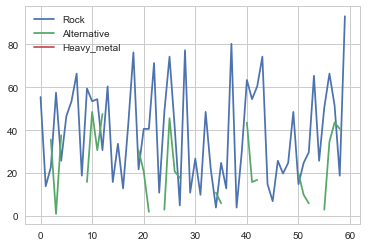

In [44]:
combine2.plot()